In [5]:
import numpy as np
import pandas as pd 
import os 
os.chdir('/Users/Abhi/Downloads/telecom/')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=pd.read_csv('data_dictionary.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test .csv')
solution=pd.read_csv('solution (1).csv')

In [6]:
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [7]:
train.shape

(69999, 172)

In [8]:
train.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [9]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [10]:
test.shape

(30000, 171)

In [11]:
test.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [12]:
comb=pd.concat([train,test])

In [13]:
comb.shape

(99999, 172)

In [14]:
# Calculating the percentage of the data set for null values :

In [15]:
percent_null = comb.isnull().sum().sum() / np.product(comb.shape) * 100
percent_null

15.425369369972769

In [16]:
null_colls = []
for i in comb.columns:
    null_col = comb[i].isnull().sum() / comb.shape[0] * 100
    if null_col>50:
       null_colls+=[i]
    print("{} : {:.2f}".format(i,null_col))

id : 0.00
circle_id : 0.00
loc_og_t2o_mou : 1.02
std_og_t2o_mou : 1.02
loc_ic_t2o_mou : 1.02
last_date_of_month_6 : 0.00
last_date_of_month_7 : 0.60
last_date_of_month_8 : 1.10
arpu_6 : 0.00
arpu_7 : 0.00
arpu_8 : 0.00
onnet_mou_6 : 3.94
onnet_mou_7 : 3.86
onnet_mou_8 : 5.38
offnet_mou_6 : 3.94
offnet_mou_7 : 3.86
offnet_mou_8 : 5.38
roam_ic_mou_6 : 3.94
roam_ic_mou_7 : 3.86
roam_ic_mou_8 : 5.38
roam_og_mou_6 : 3.94
roam_og_mou_7 : 3.86
roam_og_mou_8 : 5.38
loc_og_t2t_mou_6 : 3.94
loc_og_t2t_mou_7 : 3.86
loc_og_t2t_mou_8 : 5.38
loc_og_t2m_mou_6 : 3.94
loc_og_t2m_mou_7 : 3.86
loc_og_t2m_mou_8 : 5.38
loc_og_t2f_mou_6 : 3.94
loc_og_t2f_mou_7 : 3.86
loc_og_t2f_mou_8 : 5.38
loc_og_t2c_mou_6 : 3.94
loc_og_t2c_mou_7 : 3.86
loc_og_t2c_mou_8 : 5.38
loc_og_mou_6 : 3.94
loc_og_mou_7 : 3.86
loc_og_mou_8 : 5.38
std_og_t2t_mou_6 : 3.94
std_og_t2t_mou_7 : 3.86
std_og_t2t_mou_8 : 5.38
std_og_t2m_mou_6 : 3.94
std_og_t2m_mou_7 : 3.86
std_og_t2m_mou_8 : 5.38
std_og_t2f_mou_6 : 3.94
std_og_t2f_mou_7 : 3.8

In [17]:
# These are the columns which are having more than 50 % of null values in the Data set 

In [18]:
null_colls

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [19]:
comb.drop(null_colls,axis=1,inplace=True) # Dropping these columns 

In [20]:
def nul(x):
    a=x.isnull().sum().sort_values(ascending=False)
    b=(x.isnull().sum())/len(x)*100
    return pd.concat([a,b],axis=1)

In [21]:
nul(comb)

,0,1
churn_probability,30000,30.000300
loc_og_t2c_mou_8,5378,5.378054
loc_og_t2f_mou_8,5378,5.378054
spl_og_mou_8,5378,5.378054
loc_ic_t2t_mou_8,5378,5.378054
loc_og_t2m_mou_8,5378,5.378054
loc_ic_t2m_mou_8,5378,5.378054
loc_og_t2t_mou_8,5378,5.378054
loc_ic_t2f_mou_8,5378,5.378054
std_og_t2f_mou_8,5378,5.378054


In [22]:
object_colls=[]
for i in comb.columns:
    if comb[i].dtype==object:
        object_colls+=[i]

In [23]:
object_colls

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [24]:
comb.drop(object_colls,axis=1,inplace=True)

In [25]:
# So for the First approach we are dropping the columns which are having more than 50% of null values 
# Secondly we are dropping the columns which are having dates in the data set 
# As the dates are not of use in machine learning

In [26]:
# Checking for the columns which are having unique values that is only 1 
# The 1 unique values columnbs is of no use because there is no standard deviation in the column
# Hence there is no information gain 

In [27]:
unique_colls=[]
for i in comb.columns:
    if comb[i].nunique()==1:
        unique_colls+=[i]

In [28]:
unique_colls

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [29]:
# Dropping Unneccessary  Columns from the Data set 

In [30]:

comb.drop(unique_colls,axis=1,inplace=True)

In [31]:
# Now we we will fetch those columns which are having less than 20 unique values
# Because we will treat those columns as categorical 
# We will try to visualize the data for more insights from the data 

In [32]:
cat_colls=[]
for i in comb.columns:
    if comb[i].nunique()<20:
        cat_colls+=[i]
        

In [33]:
cat_colls # These are the columns which we will consider as the categorical columns 

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'churn_probability']

In [34]:
len(cat_colls) # Checking the Length if the columns to make a loop for plotting the variables 

7

In [35]:
# Importing required Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

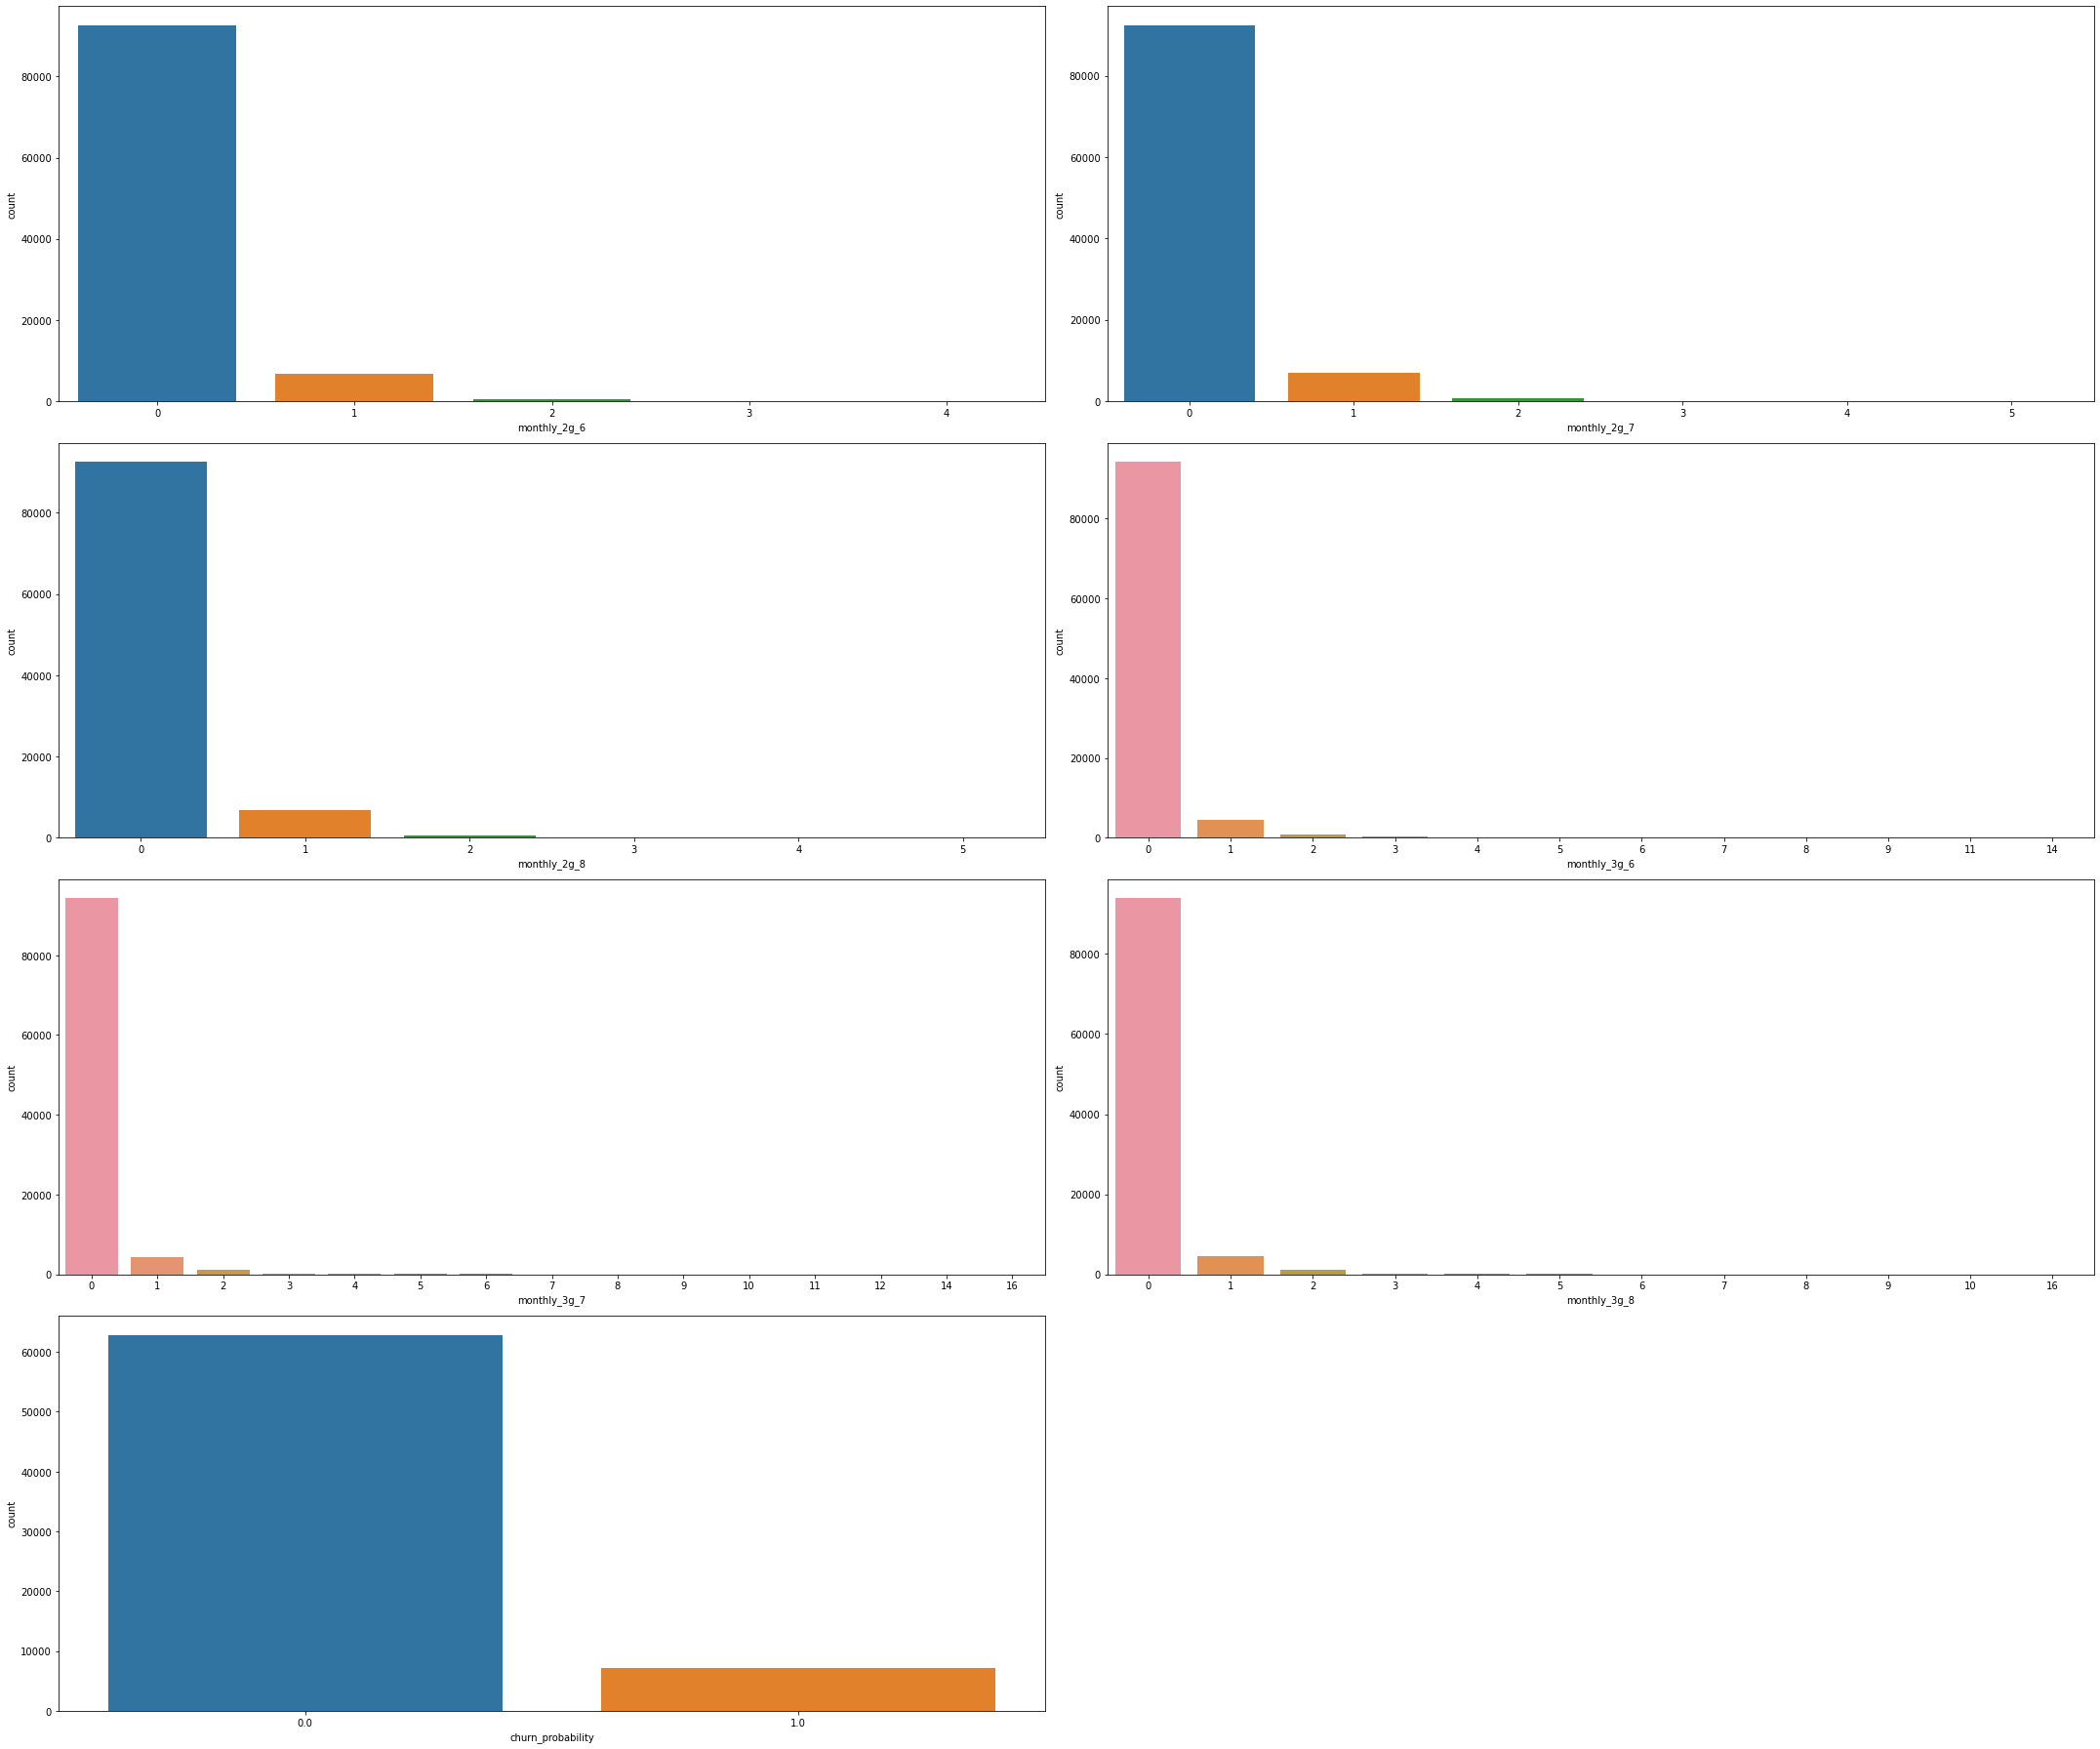

In [36]:
plt.rcParams['figure.figsize']=[30,25]
rows=4
col=2
counter=1
for i in cat_colls:
    plt.subplot(rows,col,counter)
    sns.countplot(comb[i])
    counter+=1
    
plt.tight_layout()
plt.show()

In [37]:
comb.tail()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
29995,99994,718.870,396.259,406.150,324.46,250.01,285.41,190.36,166.14,221.96,87.76,14.78,0.00,112.43,8.46,0.00,214.99,233.96,277.24,161.76,158.19,193.58,12.09,2.51,6.53,0.00,1.68,0.00,388.86,394.68,477.36,0.91,8.98,8.16,10.29,1.25,21.84,0.0,0.00,0.0,11.21,10.23,30.01,2.31,1.10,0.0,0.00,1.68,0.00,0.0,0.0,0.0,402.39,407.69,507.38,142.58,177.56,281.24,272.21,269.99,344.29,4.81,9.93,10.73,419.61,457.49,636.28,15.21,14.93,9.98,7.25,6.54,16.29,2.83,5.66,1.31,25.29,27.14,27.59,444.91,484.64,663.88,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,8,6,4,669,559,440,220,229,220,0,220,220,21.98,0.00,0.00,45.07,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,1255,3.71,105.64,61.48,NaN
29996,99995,218.327,324.070,374.981,263.79,467.24,650.26,108.53,124.11,189.76,3.40,0.00,0.00,8.29,0.00,0.00,5.08,17.33,13.16,22.44,33.63,13.03,0.00,0.66,0.00,0.00,0.18,0.00,27.53,51.63,26.19,257.21,449.91,637.09,79.28,85.36,176.73,0.0,0.00,0.0,336.49,535.28,813.83,0.00,0.00,0.0,0.00,4.44,0.00,0.0,0.0,0.0,364.03,591.36,840.03,1.73,18.41,13.99,13.83,24.03,25.49,3.16,10.18,19.28,18.73,52.63,58.78,3.76,10.51,13.55,0.00,1.28,9.59,0.00,0.00,0.00,3.76,11.79,23.14,22.49,64.43,81.93,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3,3,4,317,298,496,250,169,279,0,110,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,2258,0.00,0.00,0.00,NaN
29997,99996,139.473,38.230,180.194,11.08,14.89,19.94,37.24,16.74,45.28,0.00,0.00,24.59,0.00,0.00,15.58,11.08,6.66,7.58,22.93,8.24,25.06,0.00,0.00,0.00,0.00,0.00,1.65,34.01,14.91,32.64,0.00,8.23,3.26,14.31,8.49,12.08,0.0,0.00,0.0,14.31,16.73,15.34,0.00,0.00,0.0,0.00,0.00,1.65,0.0,0.0,0.0,48.33,31.64,49.64,2.51,10.04,10.44,3.56,1.94,5.63,3.98,4.08,0.00,10.06,16.08,16.08,0.00,2.26,2.15,0.00,0.00,2.13,0.00,0.00,0.00,0.00,2.26,4.28,10.06,18.34,20.36,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,5,2,9,150,0,240,50,0,50,50,0,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,440,0.00,0.00,0.00,NaN
29998,99997,1122.912,781.121,257.439,122.74,50.23,26.46,1854.09,1088.83,306.16,0.00,21.66,0.00,0.00,26.94,0.00,1.06,4.81,0.00,58.16,80.68,26.76,0.00,0.00,0.00,8.98,3.18,1.99,59.23,85.49,26.76,121.68,45.41,26.46,1786.94,973.36,277.39,0.0,0.00,0.0,1908.63,1018.78,303.86,0.00,0.00,0.0,8.98,7.83,1.99,0.0,0.0

In [38]:
indicis=comb.churn_probability.isnull().index

In [39]:
indicis

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998,
            29999],
           dtype='int64', length=99999)

In [40]:
nul(comb)

,0,1
churn_probability,30000,30.000300
loc_ic_t2t_mou_8,5378,5.378054
loc_og_mou_8,5378,5.378054
std_og_t2t_mou_8,5378,5.378054
std_og_t2m_mou_8,5378,5.378054
std_og_t2f_mou_8,5378,5.378054
std_og_mou_8,5378,5.378054
isd_og_mou_8,5378,5.378054
spl_og_mou_8,5378,5.378054
og_others_8,5378,5.378054


In [41]:
#newtrain=comb.iloc[0:train.shape[0],:]
#newtest=comb.iloc[train.shape[0]:]

In [42]:
x=comb.drop('churn_probability',axis=1)

In [43]:
 # !git clone https://github.com/analokmaus/kuma_utils.git


In [44]:
from kuma_utils.preprocessing.imputer import LGBMImputer
lgbm_imtr = LGBMImputer(n_iter=100, verbose=True)
x = lgbm_imtr.fit_transform(x)

  0%|          | 0/81 [00:00<?, ?it/s]

In [45]:
x.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.

In [46]:
nul(x)

,0,1
id,0,0.0
total_ic_mou_6,0,0.0
total_rech_num_7,0,0.0
total_rech_num_6,0,0.0
ic_others_8,0,0.0
ic_others_7,0,0.0
ic_others_6,0,0.0
isd_ic_mou_8,0,0.0
isd_ic_mou_7,0,0.0
isd_ic_mou_6,0,0.0


In [47]:
 # As the null values are Treated via LGBM imputer 

In [48]:
y=comb[['churn_probability']]

In [49]:
final=pd.concat([x,y],axis=1)

In [50]:
final.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0.0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110

In [51]:
nul(final)

,0,1
churn_probability,30000,30.0003
total_ic_mou_6,0,0.0000
total_rech_num_7,0,0.0000
total_rech_num_6,0,0.0000
ic_others_8,0,0.0000
ic_others_7,0,0.0000
ic_others_6,0,0.0000
isd_ic_mou_8,0,0.0000
isd_ic_mou_7,0,0.0000
isd_ic_mou_6,0,0.0000


In [52]:
# Dropping the ID column as it has all the unique values.
# No information Gain 


In [53]:
final=final.drop('id',axis=1)

In [54]:
final.shape

(99999, 125)

In [55]:
# The data is ready for base model 
# Null values Treated 
# we will split the data into new train and new test

In [56]:
newtrain=final.iloc[0:train.shape[0],:]
newtest=final.iloc[train.shape[0]:]

In [57]:
newtrain.shape,newtest.shape

((69999, 125), (30000, 125))

In [58]:
nul(newtrain)

,0,1
arpu_6,0,0.0
total_ic_mou_7,0,0.0
total_rech_num_8,0,0.0
total_rech_num_7,0,0.0
total_rech_num_6,0,0.0
ic_others_8,0,0.0
ic_others_7,0,0.0
ic_others_6,0,0.0
isd_ic_mou_8,0,0.0
isd_ic_mou_7,0,0.0


In [59]:
xtrain=newtrain.drop('churn_probability',axis=1)
ytrain=newtrain[['churn_probability']]
xtest=newtest.drop('churn_probability',axis=1)
ytest=solution[['churn_probability']]

In [60]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((69999, 124), (30000, 124), (69999, 1), (30000, 1))

In [61]:
# The data is aplitted into the train test split 
# We will try to apply the base model first 
# Then we will check for feature importance 
# We have to see the effect of imbalance target variable 


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,classification_report,cohen_kappa_score,confusion_matrix,ConfusionMatrixDisplay

In [63]:
# we will create a x train and x test in a normalized form for future refrence 
# We will check the model performance on both  the data 

In [64]:
# Created the functions so we can try different models 

In [65]:
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy:\t',accuracy_score(test,pred))
    print('Precison:\t',precision_score(test,pred))
    print('Recall:\t',recall_score(test,pred))
    print('F1 Score:\t',f1_score(test,pred))
    print('Cohen-Kappa:\t',cohen_kappa_score(test,pred))
    print('Classification Report:\t',classification_report(test,pred))

In [66]:
def roc_curv(test,pred):
    fpr,tpr,thres = roc_curve(test,pred)
    print('AUC:\t',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')

In [67]:
def model_result(model,xtrain,ytrain,xtest,ytest):
    print(str(model))
    
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    validation(ytest,ypred)
    
    y_pred_prob = model.predict_proba(xtest)[:,1]
    print()
    
    roc_curv(ytest,y_pred_prob)

In [68]:
# 1. We will apply the LOGISTIC REGRESSION First To check the significance of the variable 

In [69]:
import statsmodels.api as sm

In [70]:
X_train_con=sm.add_constant(xtrain)
X_test_con=sm.add_constant(xtest)

In [71]:
X_train_con.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,1.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,1.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0
2,1.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0
3,1.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,

# LOGISTIC REGRESSION

In [72]:
logistic_reg_model=sm.Logit(ytrain,X_train_con).fit()
print(logistic_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.199683
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:      churn_probability   No. Observations:                69999
Model:                          Logit   Df Residuals:                    69874
Method:                           MLE   Df Model:                          124
Date:                Sun, 21 Aug 2022   Pseudo R-squ.:                  0.3934
Time:                        16:29:23   Log-Likelihood:                -13978.
converged:                       True   LL-Null:                       -23044.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7959      0.043    -18.400      0.000      -0.881      -0.711
arpu

In [73]:
y_pred_lr=logistic_reg_model.predict(X_test_con)

AUC:	 0.9087701105216793


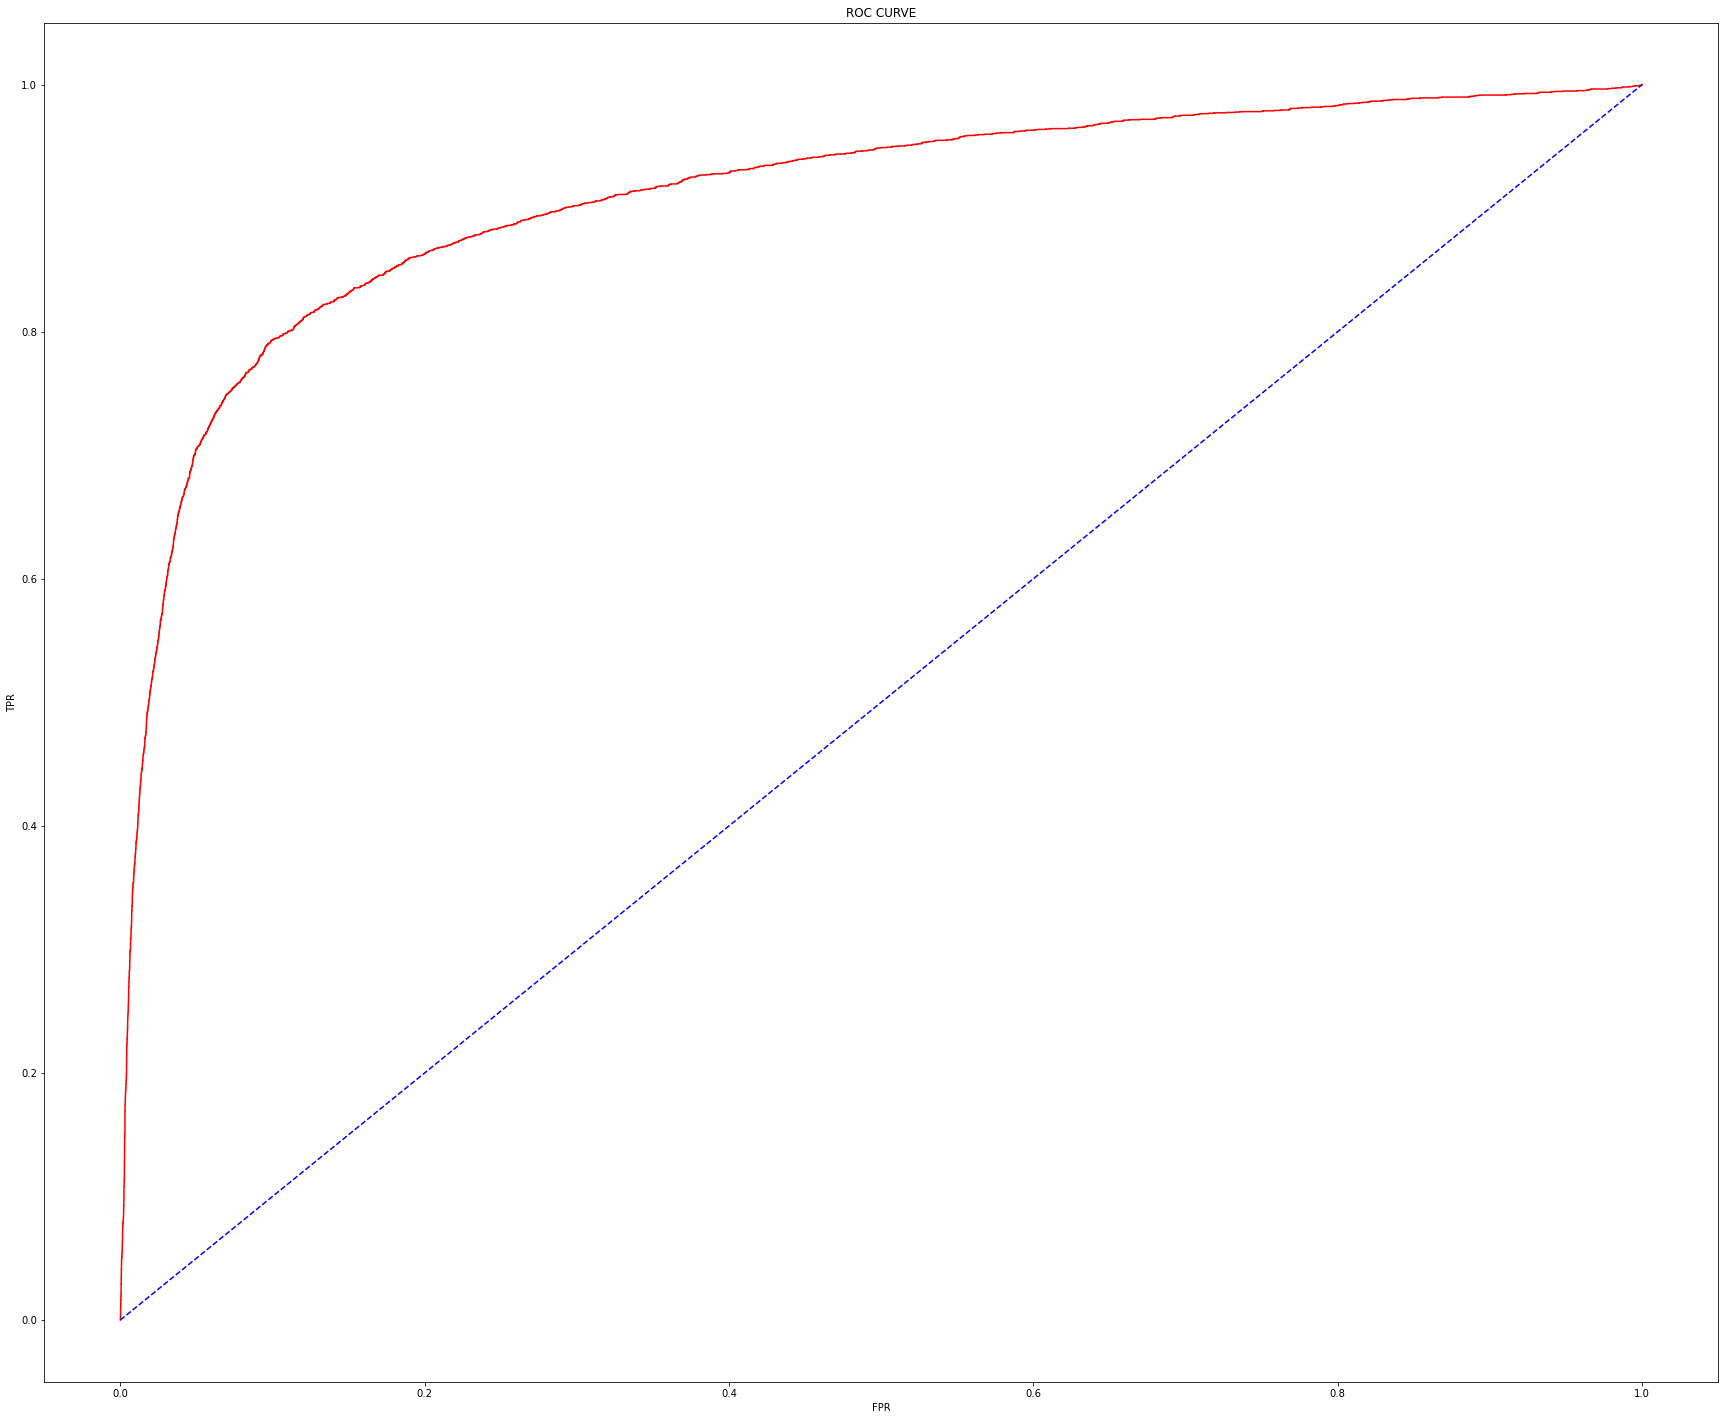

In [74]:
roc_curv(ytest,y_pred_lr)

In [75]:
lr_pred=[0 if x<0.5 else 1 for x in y_pred_lr]

In [76]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [77]:
validation(ytest,lr_pred)

Confusion Matrix
 [[26587   354]
 [ 1740  1319]]
Accuracy:	 0.9302
Precison:	 0.7884040645546921
Recall:	 0.4311866623079438
F1 Score:	 0.5574809805579036
Cohen-Kappa:	 0.523095863060826
Classification Report:	               precision    recall  f1-score   support

           0       0.94      0.99      0.96     26941
           1       0.79      0.43      0.56      3059

    accuracy                           0.93     30000
   macro avg       0.86      0.71      0.76     30000
weighted avg       0.92      0.93      0.92     30000



In [78]:
# As we have applied the Logistic regression 
# Accuracy is fine for the model 
# Model is not performing on the test data but it is showing better result in train Data 
# Recall is not fine. It might be because of imbalance target variable 
# we will try to train the data on different models 

In [79]:
# Normalizing the Train and test Data for future applications in the model

In [80]:
sc=StandardScaler()
normalized_x_train = pd.DataFrame(sc.fit_transform(xtrain),columns = xtrain.columns)

In [81]:
normalized_x_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.753587,-0.555159,-0.771000,-0.268918,-0.014448,-0.408953,-0.507793,-0.292080,-0.577630,-0.166804,-0.122712,-0.126547,-0.188374,-0.164799,-0.147040,-0.288862,-0.292098,-0.286710,-0.527191,-0.469389,-0.558842,-0.275508,-0.272939,-0.273922,-0.192535,-0.169126,-0.211714,-0.525777,-0.490982,-0.541790,-0.124110,0.167226,-0.299564,-0.262409,-0.028266,-0.325615,-0.135630,-0.127775,-0.133752,-0.254373,0.087724,-0.410509,-0.029133,-0.028155,-0.028717,0.282490,-0.190620,-0.277118,-0.014114,-0.014316,-0.015073,-0.483870,-0.185530,-0.629550,-0.317083,-0.292159,-0.268715,-0.613735,-0.497608,-0.523270,-0.299782,-0.283337,-0.295588,-0.630568,-0.539491,-0.544559,-0.179671,-0.034273,-0.173861,-0.158129,-0.010470,-0.063368,-0.127272,-0.1334,-0.12732,-0.230484,-0.043585,-0.152661,-0.647578,-0.501528,-0.547718,-0.367347,-0.238397,4.295829,-0.11962,-0.126479,-0.13001,0.023491,-0.022991,-0.080887,-0.648525,-0.809392,-0.726134,-0.621313,-0.626118,-0.736420,-0.325923,-0.324036,-0.784113,0.016059,0.059791,-0.612666,-0.243628,-0.242714,-0.235230,-0.220183,-0.232695,-0.238404,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,-0.202851,-0.214653,-0.13149,-0.128351,-0.12571,0.774197,-0.252885,-0.246124,-0.233557
1,-0.847171,-0.451263,-0.670336,-0.433544,-0.420515,-0.413183,-0.610847,-0.514073,-0.487930,-0.166804,-0.122712,-0.126547,-0.188374,-0.164799,-0.147040,-0.303906,-0.292098,-0.288577,-0.560287,-0.575007,-0.574346,-0.275508,-0.272939,-0.273922,-0.192535,2.665583,4.461896,-0.556069,-0.556980,-0.552629,-0.309103,-0.307477,-0.303440,-0.337038,-0.334851,-0.325615,-0.135630,-0.127775,-0.133752,-0.423159,-0.421212,-0.413024,-0.029133,-0.028155,-0.028717,-0.244616,1.188784,1.556043,-0.095417,-0.014316,-0.015073,-0.658328,-0.584066,-0.570902,-0.322518,-0.186011,-0.248837,-0.610249,-0.512286,-0.558859,-0.290737,-0.244475,-0.205296,-0.629847,-0.481184,-0.543255,-0.179671,-0.172424,-0.177836,-0.252807,-0.243313,-0.251563,-0.127272,-0.1334,-0.12732,-0.303272,-0.289577,-0.296112,-0.676532,-0.547355,-0.601544,-0.367347,-0.238397,-0.195293,-0.11962,-0.126479,-0.13001,-0.069478,-0.075994,-0.080887,-0.648525,-0.525726,-0.309210,-0.811809,-0.431502,-0.642563,-0.861313,0.338316,-0.462558,-0.647517,-

In [82]:
normalized_x_test = pd.DataFrame(sc.fit_transform(xtest),columns = xtest.columns)

In [83]:
normalized_x_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.606452,-0.662206,-0.659863,-0.327926,-0.361565,-0.347973,-0.409162,-0.477024,-0.460363,-0.102031,-0.071245,-0.082172,-0.194810,-0.163878,-0.156049,-0.140789,-0.163283,-0.160699,-0.442612,-0.479153,-0.494091,-0.228914,0.639297,-0.260462,-0.23339,-0.207592,-0.190713,-0.388654,-0.372847,-0.436881,-0.281332,-0.313708,-0.298515,-0.159395,-0.290096,-0.211272,-0.146127,-0.126363,-0.126519,-0.288080,-0.393858,-0.331543,-0.056689,-0.049752,-0.057907,-0.298412,-0.296956,-0.269175,-0.222222,-0.014618,-0.013589,-0.458266,-0.533152,-0.512406,-0.112919,-0.063833,-0.181710,-0.530797,-0.566832,-0.536741,-0.279369,-0.297851,-0.285449,-0.473991,-0.470433,-0.514135,-0.160026,-0.168073,-0.167597,-0.242832,-0.237263,-0.184430,-0.130051,-0.129487,-0.130505,-0.285910,-0.287356,-0.244596,-0.539893,-0.536330,-0.559349,3.234357,1.631671,2.568132,-0.132359,-0.124822,-0.129726,-0.073672,-0.08724,-0.058991,-0.354669,-0.377391,-0.440954,-0.582117,-0.584180,-0.673784,-0.461468,-0.573552,-0.589651,-0.338998,-0.305026,-0.573204,-0.242492,-0.238115,-0.238721,-0.230589,-0.252777,-0.252364,-0.271988,-0.272869,-0.270287,-0.259611,-0.271984,-0.27778,-0.203881,-0.203197,-0.217358,-0.131822,-0.127067,-0.134416,0.493678,-0.259300,-0.247347,-0.243369
1,0.418126,0.730857,0.248208,-0.175052,-0.291172,-0.359060,0.914374,1.314206,0.637961,-0.102031,-0.071245,-0.082172,-0.194810,-0.163878,-0.156049,0.201514,-0.026909,-0.169329,2.364622,3.114652,1.793298,-0.182870,-0.238026,-0.260462,-0.23339,-0.207592,-0.194929,1.657328,1.997884,1.079576,-0.309859,-0.313708,-0.306550,-0.327002,-0.230250,-0.243837,-0.146127,-0.126363,-0.126519,-0.417270,-0.353794,-0.358274,-0.056689,-0.049752,0.012647,-0.298412,-0.296956,-0.270868,-0.222222,-0.014618,-0.013589,0.540454,0.733477,0.234806,-0.188260,-0.140375,-0.337664,0.317599,0.101674,0.468342,-0.249384,-0.297851,-0.285449,0.079158,-0.053417,0.115602,-0.160026,-0.168073,-0.167597,-0.247307,-0.099195,-0.234812,-0.130051,-0.129487,-0.130505,-0.289225,-0.183744,-0.283712,0.322561,0.446516,0.282203,-0.391723,-0.174198,-0.277878,1.925743,2.509734,1.351097,-0.073672,-0.08724,-0.058991,-0.354669,-0.517911,-0.302501,0.453948,0.437934,0.445449,1.222823,1.082656,1.069924,1.954021,-0.614179,-0.573204,

In [84]:
normalized_x_test.shape

(30000, 124)

# LIGHT GBM Classifier

In [85]:
lgb=LGBMClassifier()
lgbm_model=lgb.fit(xtrain,ytrain)
lgbm_pred=lgbm_model.predict(xtest)

In [86]:
validation(ytest,lgbm_pred)

Confusion Matrix
 [[26311   630]
 [ 1034  2025]]
Accuracy:	 0.9445333333333333
Precison:	 0.7627118644067796
Recall:	 0.6619810395554102
F1 Score:	 0.7087854392719635
Cohen-Kappa:	 0.6783022400719798
Classification Report:	               precision    recall  f1-score   support

           0       0.96      0.98      0.97     26941
           1       0.76      0.66      0.71      3059

    accuracy                           0.94     30000
   macro avg       0.86      0.82      0.84     30000
weighted avg       0.94      0.94      0.94     30000



In [87]:
lgbm_pred_proba=lgbm_model.predict_proba(xtest)

AUC:	 0.819298303453144


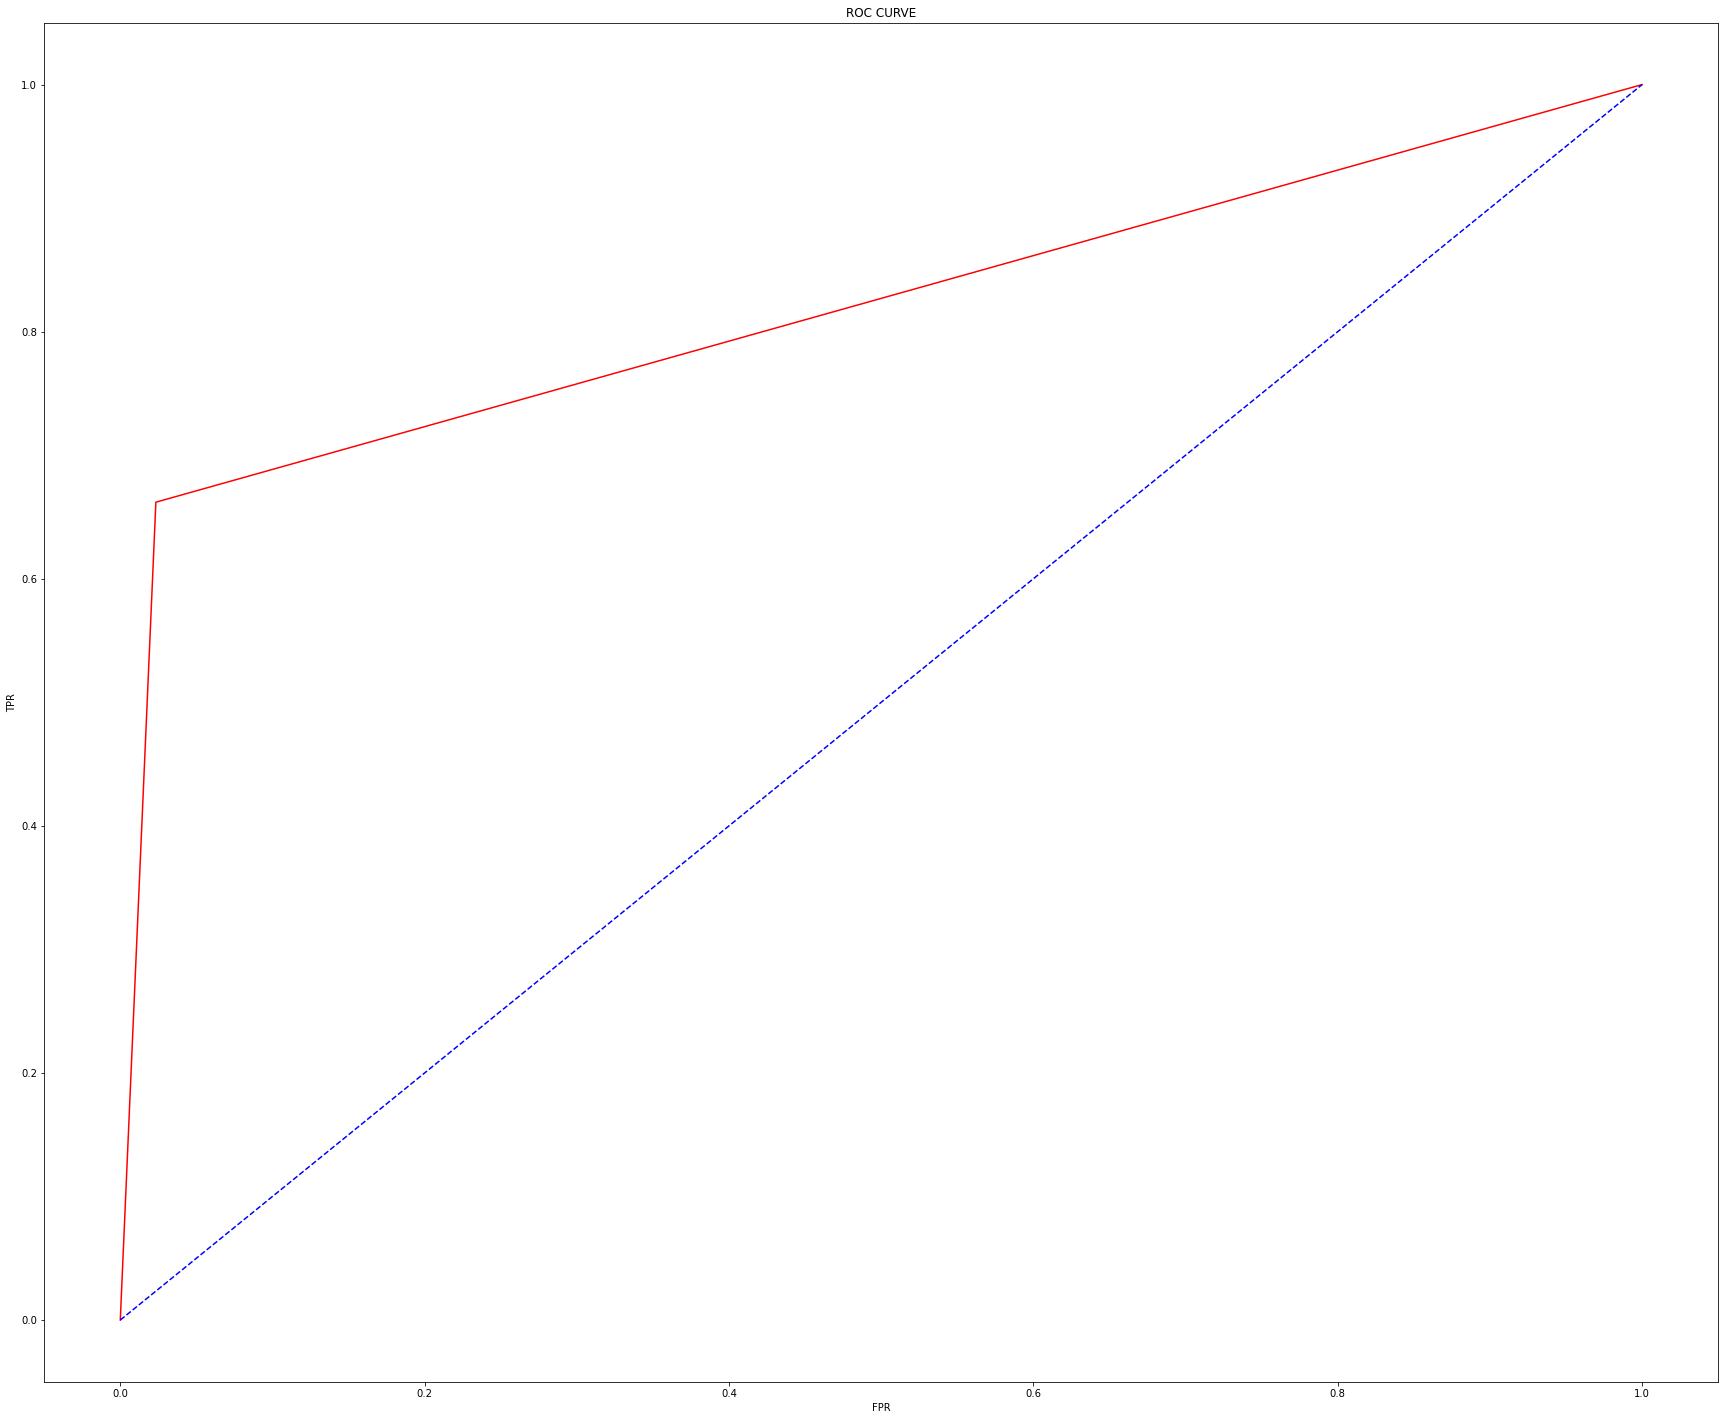

In [88]:
roc_curv(ytest,lgbm_pred)

In [89]:
from lightgbm import LGBMClassifier, plot_importance


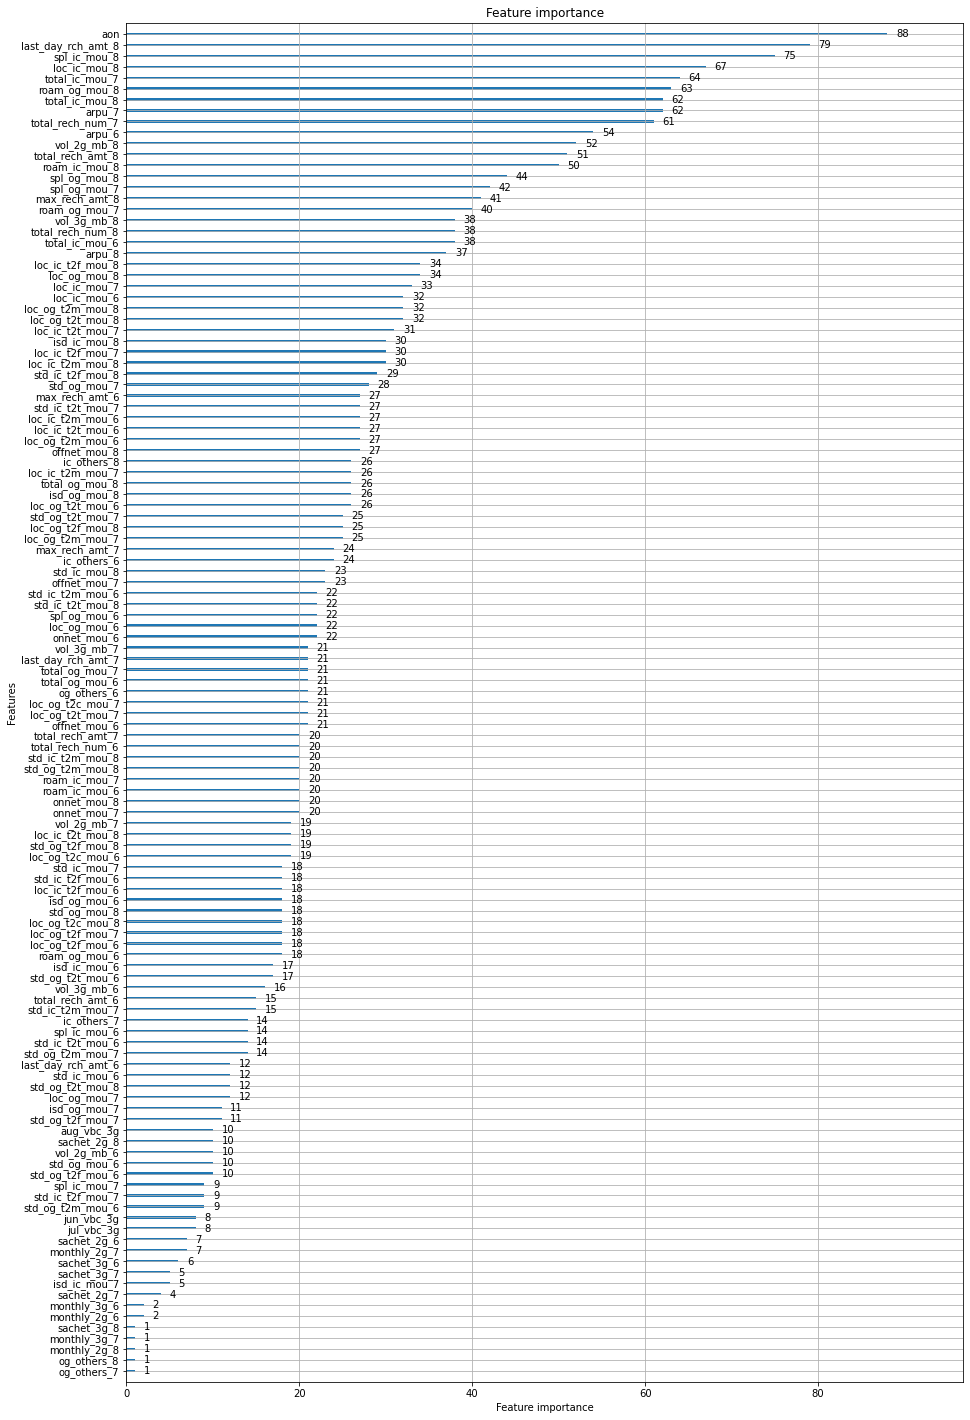

In [90]:
plot_importance(lgbm_model,figsize=(15, 25))
plt.show()

In [91]:
# Now we will try with the Normalized Data 

In [92]:
lg=LGBMClassifier()
lgbm_modl_2=lg.fit(normalized_x_train,ytrain)
lgbm_2_pred=lgbm_modl_2.predict(normalized_x_test)

In [93]:
validation(ytest,lgbm_2_pred)

Confusion Matrix
 [[26616   325]
 [ 2599   460]]
Accuracy:	 0.9025333333333333
Precison:	 0.5859872611464968
Recall:	 0.15037593984962405
F1 Score:	 0.2393340270551509
Cohen-Kappa:	 0.20627861484579313
Classification Report:	               precision    recall  f1-score   support

           0       0.91      0.99      0.95     26941
           1       0.59      0.15      0.24      3059

    accuracy                           0.90     30000
   macro avg       0.75      0.57      0.59     30000
weighted avg       0.88      0.90      0.88     30000



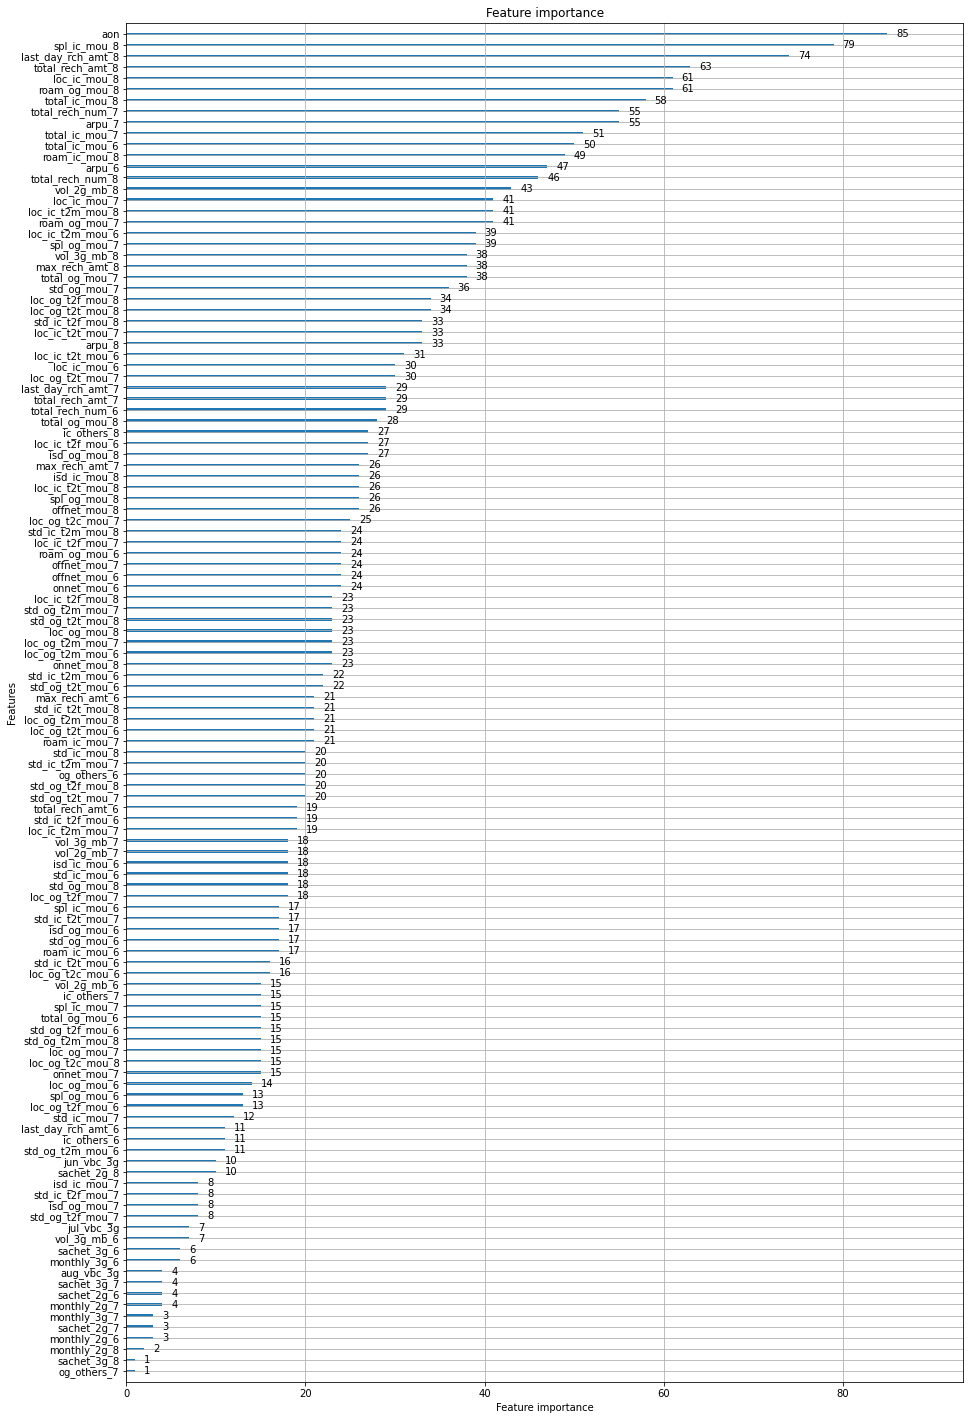

In [94]:
plot_importance(lgbm_modl_2,figsize=(15, 25))
plt.show()

In [95]:
ytest.value_counts()

churn_probability
0                    26941
1                     3059
dtype: int64

AUC:	 0.569156271027221


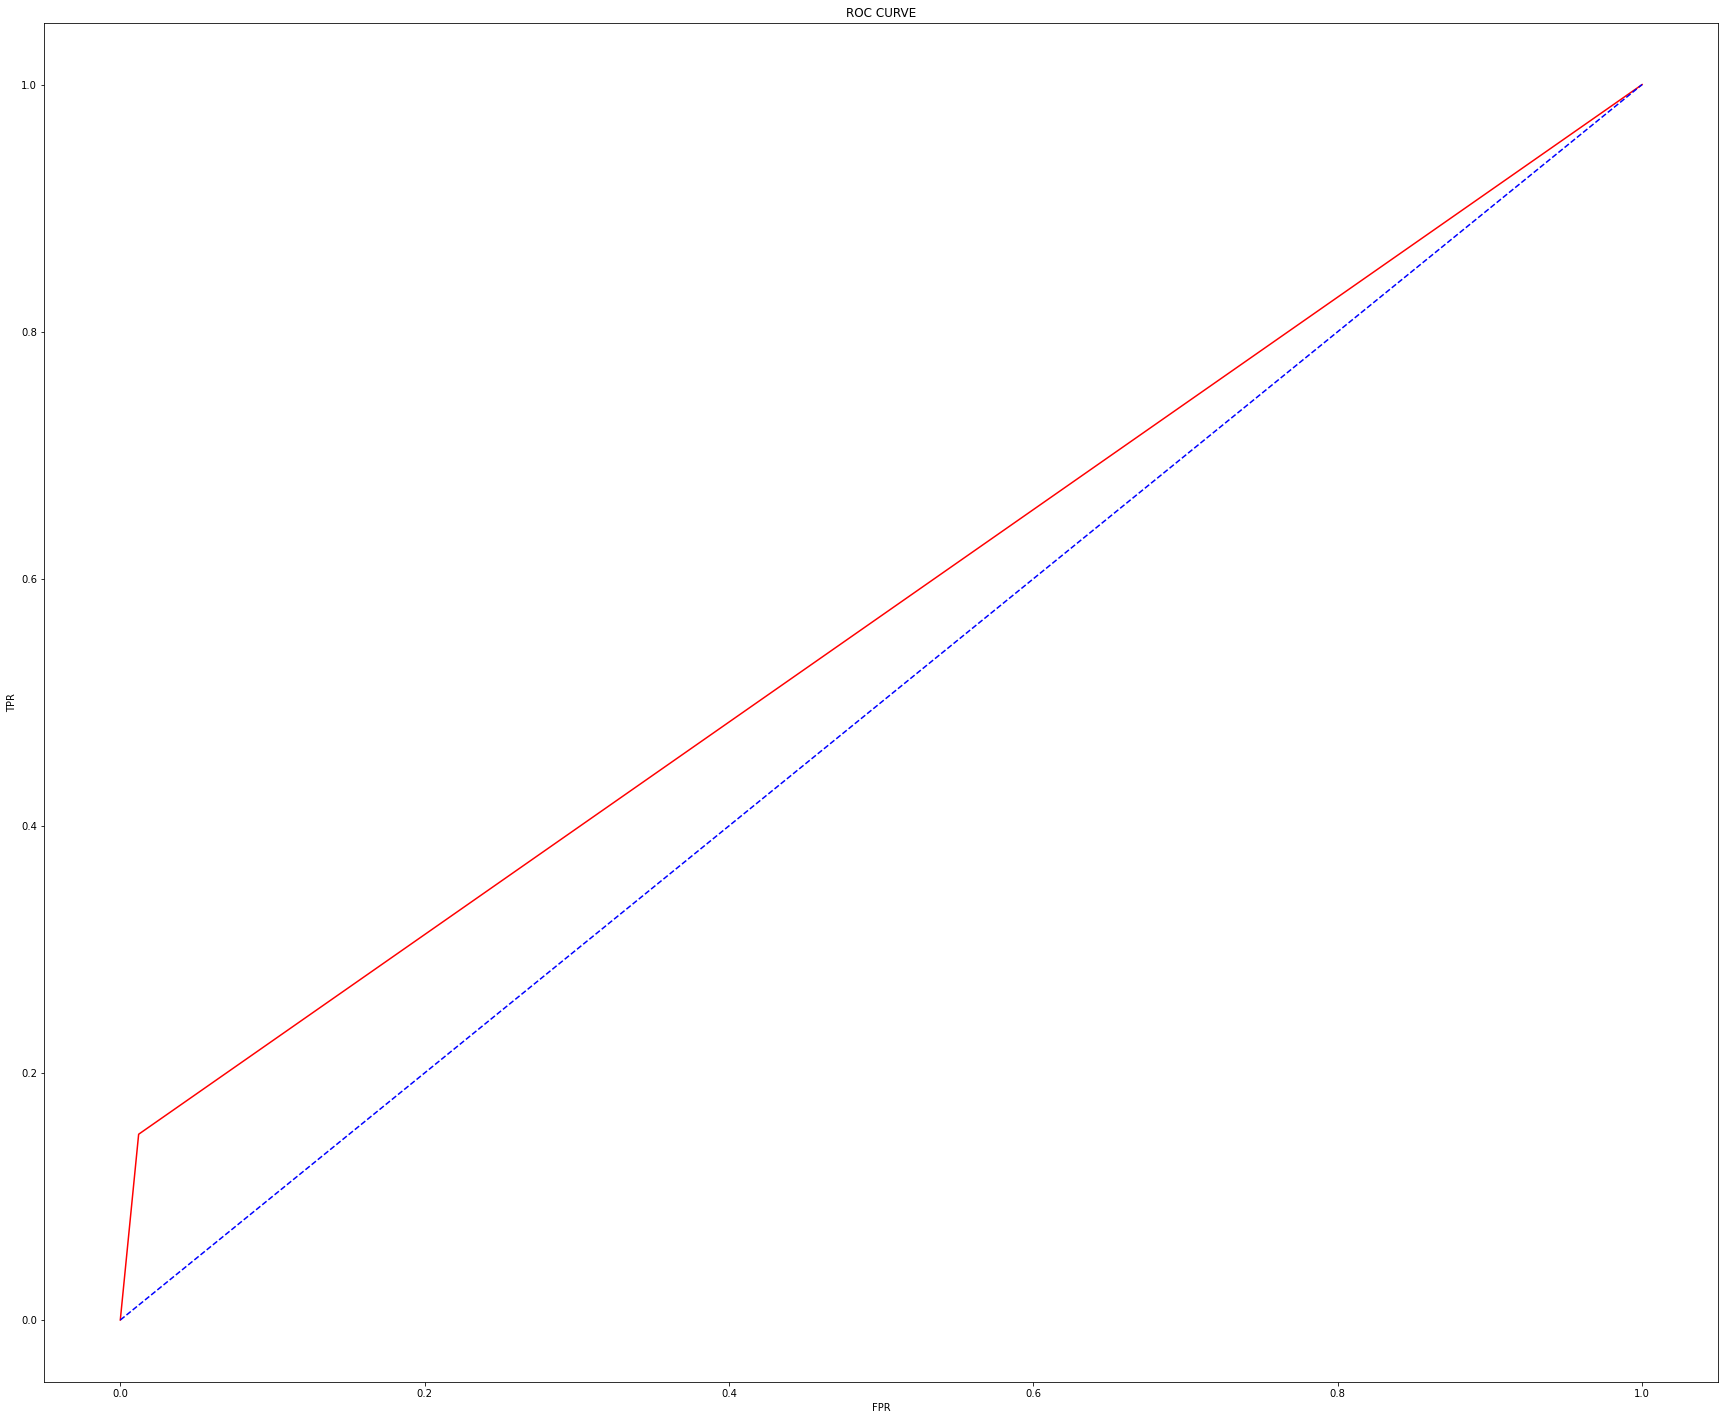

In [96]:
roc_curv(ytest,lgbm_2_pred)

In [97]:
lg = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=20,
                    learning_rate=0.1, max_depth=20, reg_lambda=0.2)
lgbm_modl_3=lg.fit(normalized_x_train,ytrain)

In [98]:
lgbm_3_pred=lgbm_modl_3.predict(normalized_x_test)

In [99]:
validation(ytest,lgbm_3_pred)

Confusion Matrix
 [[26779   162]
 [ 2561   498]]
Accuracy:	 0.9092333333333333
Precison:	 0.7545454545454545
Recall:	 0.16279830009807125
F1 Score:	 0.2678139284753966
Cohen-Kappa:	 0.24032000857046254
Classification Report:	               precision    recall  f1-score   support

           0       0.91      0.99      0.95     26941
           1       0.75      0.16      0.27      3059

    accuracy                           0.91     30000
   macro avg       0.83      0.58      0.61     30000
weighted avg       0.90      0.91      0.88     30000



In [100]:
lg = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=20,
                    learning_rate=0.1, max_depth=20, reg_lambda=0.2)
lgbm_modl_4=lg.fit(xtrain,ytrain)


In [101]:
lgbm_4_pred=lgbm_modl_4.predict(xtest)

In [102]:
validation(ytest,lgbm_4_pred) #######. best model till now 

Confusion Matrix
 [[26316   625]
 [ 1037  2022]]
Accuracy:	 0.9446
Precison:	 0.7638836418587079
Recall:	 0.6610003269042171
F1 Score:	 0.7087276550998949
Cohen-Kappa:	 0.6782928050876245
Classification Report:	               precision    recall  f1-score   support

           0       0.96      0.98      0.97     26941
           1       0.76      0.66      0.71      3059

    accuracy                           0.94     30000
   macro avg       0.86      0.82      0.84     30000
weighted avg       0.94      0.94      0.94     30000



AUC:	 0.8189007424952028


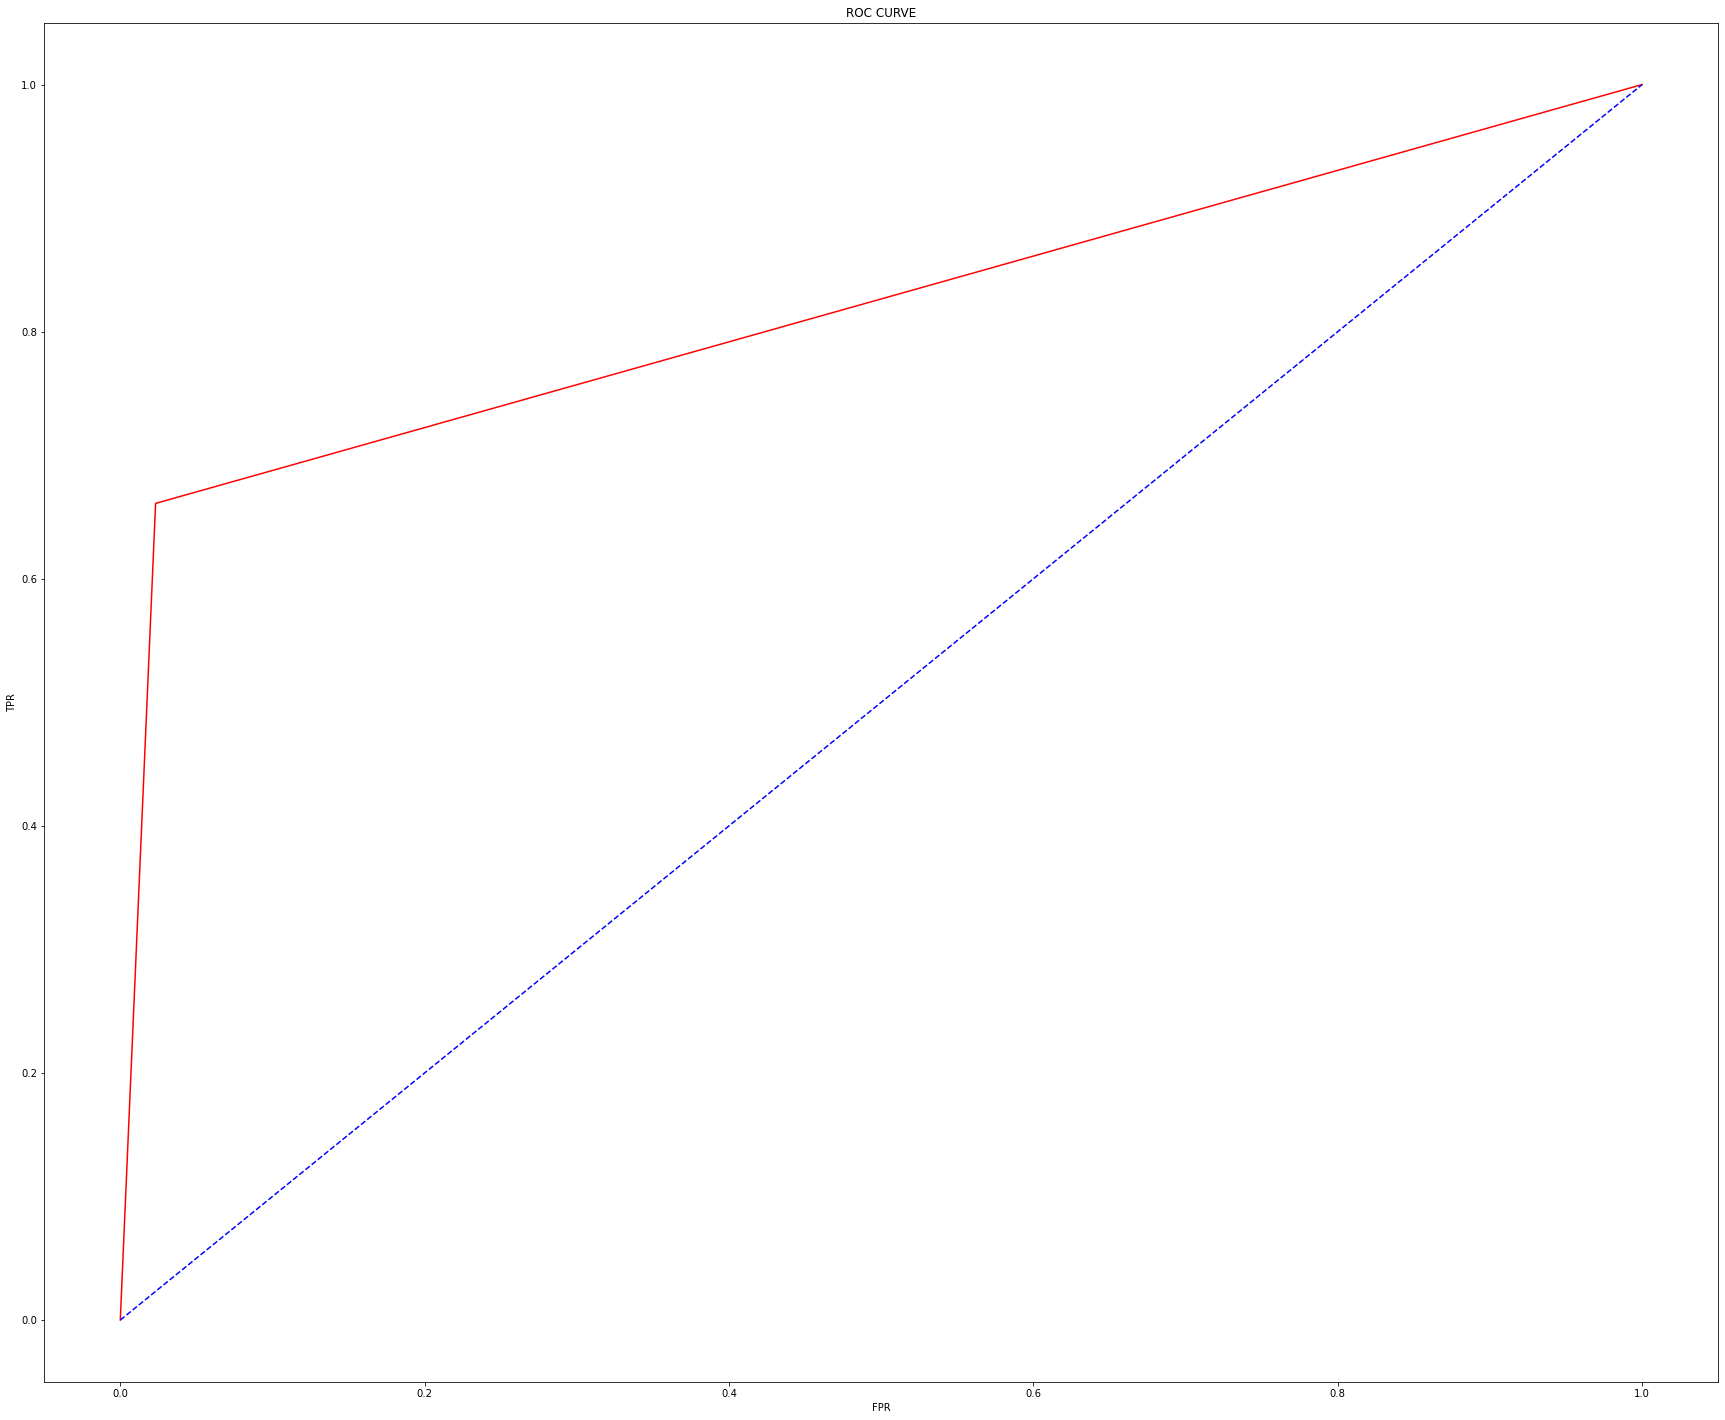

In [103]:
roc_curv(ytest,lgbm_4_pred)

In [104]:
xg=XGBClassifier()
model1=xg.fit(xtrain,ytrain)
pred_xg=model1.predict(xtest)

In [105]:
validation(ytest,pred_xg)

Confusion Matrix
 [[26302   639]
 [ 1074  1985]]
Accuracy:	 0.9429
Precison:	 0.7564786585365854
Recall:	 0.6489048708728342
F1 Score:	 0.6985746964631357
Cohen-Kappa:	 0.6672415916955519
Classification Report:	               precision    recall  f1-score   support

           0       0.96      0.98      0.97     26941
           1       0.76      0.65      0.70      3059

    accuracy                           0.94     30000
   macro avg       0.86      0.81      0.83     30000
weighted avg       0.94      0.94      0.94     30000



AUC:	 0.8125931874500766


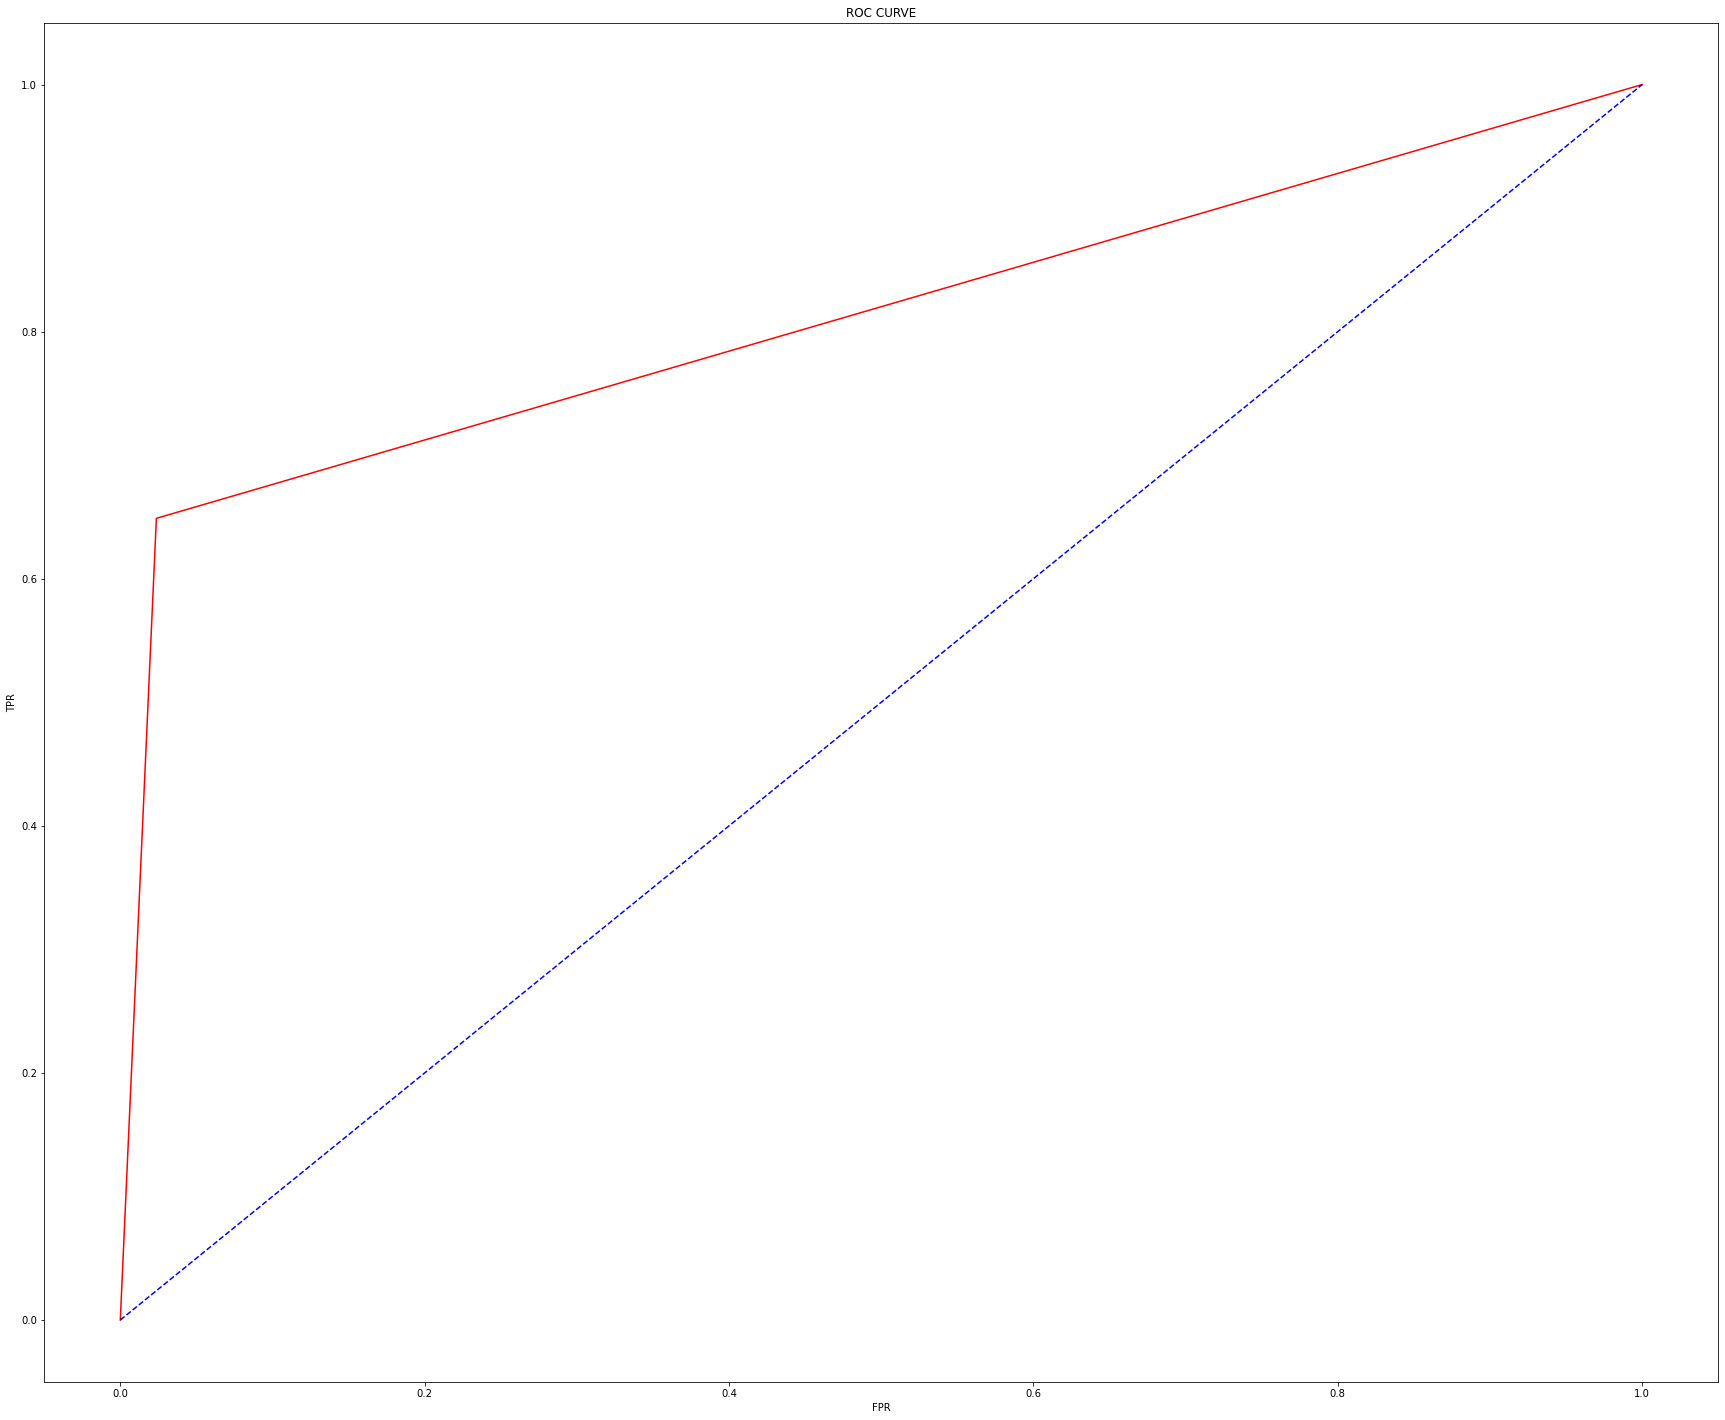

In [106]:
roc_curv(ytest,pred_xg)

In [107]:
xg=XGBClassifier()
model2=xg.fit(normalized_x_train,ytrain)
pred_xg_1=model2.predict(normalized_x_test)

In [108]:
validation(ytest,pred_xg_1)

Confusion Matrix
 [[25874  1067]
 [ 1567  1492]]
Accuracy:	 0.9122
Precison:	 0.5830402500976944
Recall:	 0.487741091860085
F1 Score:	 0.5311498754004984
Cohen-Kappa:	 0.4831376706572861
Classification Report:	               precision    recall  f1-score   support

           0       0.94      0.96      0.95     26941
           1       0.58      0.49      0.53      3059

    accuracy                           0.91     30000
   macro avg       0.76      0.72      0.74     30000
weighted avg       0.91      0.91      0.91     30000



In [109]:
 from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
 x_train, y_train = smote.fit_resample(xtrain,ytrain)



In [110]:
 x_train.shape,y_train.shape

((125734, 124), (125734, 1))

In [111]:
x_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00

In [112]:
lg = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=20,
                    learning_rate=0.1, max_depth=20, reg_lambda=0.2)
lgbm_modl_5=lg.fit(x_train,y_train)

In [113]:
pred=lgbm_modl_5.predict(xtest)

In [114]:
validation(ytest,pred)

Confusion Matrix
 [[25779  1162]
 [  881  2178]]
Accuracy:	 0.9319
Precison:	 0.6520958083832336
Recall:	 0.7119973847662635
F1 Score:	 0.680731364275668
Cohen-Kappa:	 0.6426986587295906
Classification Report:	               precision    recall  f1-score   support

           0       0.97      0.96      0.96     26941
           1       0.65      0.71      0.68      3059

    accuracy                           0.93     30000
   macro avg       0.81      0.83      0.82     30000
weighted avg       0.93      0.93      0.93     30000



In [115]:
# No effect shown after over sampling the data via Smoting

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dc=DecisionTreeClassifier()
model=dc.fit(x_train,y_train)
pred=model.predict(xtest)
validation(ytest,pred)
# Decision Tree with Over sampling Technique

Confusion Matrix
 [[24533  2408]
 [ 1066  1993]]
Accuracy:	 0.8842
Precison:	 0.4528516246307657
Recall:	 0.6515201046093495
F1 Score:	 0.5343163538873995
Cohen-Kappa:	 0.4706277163662924
Classification Report:	               precision    recall  f1-score   support

           0       0.96      0.91      0.93     26941
           1       0.45      0.65      0.53      3059

    accuracy                           0.88     30000
   macro avg       0.71      0.78      0.73     30000
weighted avg       0.91      0.88      0.89     30000



In [118]:
dc=DecisionTreeClassifier()
model1=dc.fit(xtrain,ytrain)
pred1=model1.predict(xtest)
validation(ytest,pred1)
# Decision tree with normal Data 

Confusion Matrix
 [[25445  1496]
 [ 1294  1765]]
Accuracy:	 0.907
Precison:	 0.541245016865992
Recall:	 0.5769859431186662
F1 Score:	 0.5585443037974683
Cohen-Kappa:	 0.5066289790151798
Classification Report:	               precision    recall  f1-score   support

           0       0.95      0.94      0.95     26941
           1       0.54      0.58      0.56      3059

    accuracy                           0.91     30000
   macro avg       0.75      0.76      0.75     30000
weighted avg       0.91      0.91      0.91     30000



In [119]:
dc=DecisionTreeClassifier()
model2=dc.fit(normalized_x_train,ytrain)
pred2=model2.predict(normalized_x_test)
validation(ytest,pred2)

Confusion Matrix
 [[19762  7179]
 [ 2192   867]]
Accuracy:	 0.6876333333333333
Precison:	 0.10775540641312453
Recall:	 0.2834259561948349
F1 Score:	 0.1561458802341288
Cohen-Kappa:	 0.009842656379878356
Classification Report:	               precision    recall  f1-score   support

           0       0.90      0.73      0.81     26941
           1       0.11      0.28      0.16      3059

    accuracy                           0.69     30000
   macro avg       0.50      0.51      0.48     30000
weighted avg       0.82      0.69      0.74     30000

